In [1]:
%matplotlib notebook

from combine.philip_zb_w7xt_version2 import gen_grid
from matplotlib import pyplot as plt
import ipywidgets as widgets
import numpy as np

from combine.quick_g import widget_g_plot
import combine.grid_analyze_version2 as ga

In [19]:
# grid parameters, you can add more!
consts = {
        # in -> outside cell numbers (sum is redial resolution)
        "NirC": 10, "NirS": 5, "NirN": 5,
        # half(-1/2) poloidal and toroidal cell number (per half-module)
        "Niphalf": 50, "Nit": 37,
        # poloidal grid spacing and smoothing options implemented by phg
        "eq_space": True, "eq_space_vessel": False, "zoidpol": False,
        # strating angle in [0,Nit[ and offset list of projection center
        "trace_index": 36, "center_delta_R": .15, # [0,0,0,0.2,.15],
        # path to magnetic field file
        "magnetic_field_file": "./Fields/Field-EIM-FullT-std.dat", # ErrFullT- FullT-
        "configuration": "EIM", # overwrites more specific changes
        "module": "full_module", # or "half_module" or "full_torus"
        "module_index": 0 # from 0 to 4 for starting position
    }

In [20]:
g = gen_grid(consts)
# eqi, eqo, zp = int(constants['eq_space']), int(constants['eq_space_vessel']), int(constants['zoidpol'])
# ta = constants['trace_angle']
# g = gen_grid(constants, save=f"../grids/g_eqi{eqi}_eqo{eqo}_zp{zp}_ta{ta}.npy")

GRID AND B FIELD RANGE MISSMATCH
r = 0, r = 1, r = 2, r = 3, r = 4, r = 5, r = 6, r = 7, r = 8, r = 9, r = 10, r = 11, r = 12, r = 13, r = 14, [21. 73.  5.  0.  0.  1.  4.]
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)


<IPython.core.display.Javascript object>


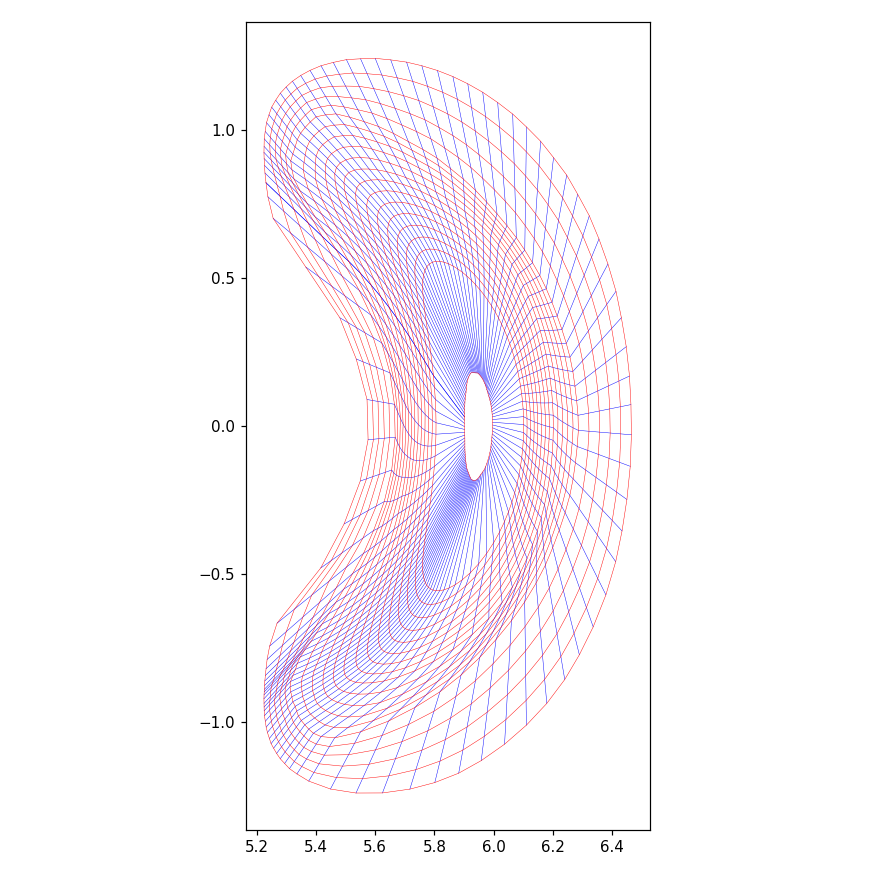

interactive(children=(IntSlider(value=18, description='phi', max=18), Output()), _dom_classes=('widget-interac…

In [21]:
# lg = np.load("../grids/g_eqi1_eqo0_zp1_ta10.npy")
widget_g_plot(g, phi=46, widget=True)

In [8]:
np.all(ga.nonconvex(lg) == 1) # is the grid valid?

False

In [14]:
ret = np.nonzero(ga.nonconvex(lg) != 1)

In [20]:
np.array([*ret]).T

array([[ 9, 21,  3],
       [ 9, 21,  4],
       [ 9, 21,  5],
       [ 9, 21,  6],
       [ 9, 21,  7],
       [ 9, 21,  8],
       [ 9, 21,  9],
       [ 9, 21, 10],
       [ 9, 21, 11]])

In [17]:
ret[0], ret[1]

(array([9, 9, 9, 9, 9, 9, 9, 9, 9]),
 array([21, 21, 21, 21, 21, 21, 21, 21, 21]))

In [9]:
np.sum(ga.volume(g))

6.962807480120733

<IPython.core.display.Javascript object>


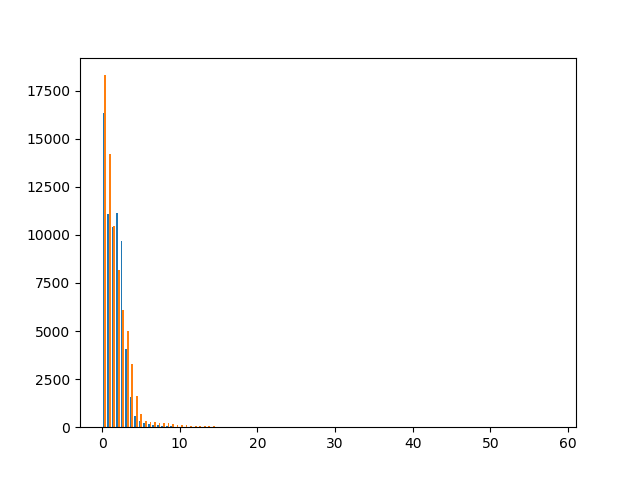

([array([1.6326e+04, 1.1097e+04, 1.0424e+04, 1.1137e+04, 9.6920e+03,
         4.0560e+03, 1.5580e+03, 6.0800e+02, 3.2200e+02, 2.2900e+02,
         1.4800e+02, 1.2000e+02, 1.0100e+02, 7.2000e+01, 4.3000e+01,
         4.2000e+01, 3.2000e+01, 1.3000e+01, 1.9000e+01, 1.8000e+01,
         2.4000e+01, 1.3000e+01, 1.5000e+01, 1.8000e+01, 2.0000e+01,
         2.0000e+01, 2.3000e+01, 2.3000e+01, 1.4000e+01, 5.0000e+00,
         1.2000e+01, 9.0000e+00, 1.3000e+01, 9.0000e+00, 1.4000e+01,
         1.3000e+01, 1.5000e+01, 1.1000e+01, 1.4000e+01, 1.7000e+01,
         8.0000e+00, 1.0000e+01, 6.0000e+00, 1.3000e+01, 1.2000e+01,
         1.0000e+01, 6.0000e+00, 1.0000e+01, 1.2000e+01, 1.2000e+01,
         9.0000e+00, 1.1000e+01, 1.6000e+01, 5.0000e+00, 6.0000e+00,
         2.0000e+00, 9.0000e+00, 3.0000e+00, 3.0000e+00, 5.0000e+00,
         7.0000e+00, 1.2000e+01, 3.0000e+00, 0.0000e+00, 4.0000e+00,
         0.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00,
         3.0000e+00, 4.0000e+00, 1

In [33]:
plt.close("all")
n1, n2 = ga.non_orthogonality(g)
plt.hist(np.array([n1,n2]).flatten(), bins=100)

In [34]:
n1.shape, n2.shape

((18, 100, 37), (19, 100, 37))

In [22]:
from itertools import product
for i,j,k,ta in product(*[[False,True]]*3, [0,10,36]):
    constants = {"NirS": 5, "NirC": 5, "NirN": 10,  # in -> outside cell number 
         "Niphalf": 50,  # half pol cell number
         "eq_space": i, "eq_space_vessel": j, "Nit": 37,
         "zoidpol": k, "trace_angle": ta, # angle is int in [0,36]
         "center_delta_R": .15}
    g = gen_grid(constants, save=f"grids/g_eqi{int(i)}_eqo{int(j)}_zp{int(k)}_ta{ta}.npy")
    print(i,j,k,ta)

File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)
False False False 0
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)
False False False 10
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)
False False False 36
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)
False False True 0
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi values with 73 R,Z values per phi.
5-fold periodicity
Reference point: 0.000000 [cm] 0.000000 [cm] (R,Z)
False False True 10
File: W7X-VacuumVessel-Medium.kis
Kisslinger mesh with 21 Phi va